## 인공지능과 가위바위보 하기 ✌✊🖐

손 사진을 인식하여 **가위, 바위, 보를 구별해내는 딥러닝 네트워크**를 만드는 프로젝트입니다.

1. 가위, 바위, 보 모양을 한 손 사진을 준비합니다.



2. 딥러닝 네트워크를 만듭니다.



3. 학습용 사진으로 딥러닝 네트워크를 훈련시킵니다.



4. 테스트 사진으로 정확도를 측정합니다.


In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob

### 1) 데이터 준비하기

데이터 준비하기 + Resize 하기

학습데이터로 가위, 바위, 보 각각 200장의 손 사진을 준비합니다.

In [14]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 56x56 사이즈로 바꾸어 저장합니다.
	target_size=(56,56)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!


In [15]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

200  images to be resized.
200  images resized.
보 이미지 resize 완료!


In [16]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

200  images to be resized.
200  images resized.
보 이미지 resize 완료!


3개의 클래스 라벨링하기(가위:0, 바위:1, 보:2)

In [29]:
import numpy as np

def load_data(img_path, number_of_data=600): 
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=56
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 600 입니다.
x_train shape: (600, 56, 56, 3)
y_train shape: (600,)


이미지 확인해보기

라벨:  0


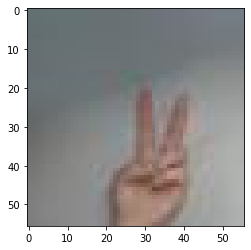

In [30]:
plt.imshow(x_train[189])
print('라벨: ', y_train[189])

### 2) 딥러닝 네트워크 설계하기

tensorflow keras의 Sequential 모델을 이용하요 딥러닝 네트워크를 구축합니다.

channel수와 dense, epoch 값을 하이퍼파라미터로 설정하여 최적의 값을 찾습니다.

In [98]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=32
n_dense=64
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(56,56,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 54, 54, 16)        448       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                294976    
_________________________________________________________________
dense_23 (Dense)             (None, 3)               

### 3) 딥러닝 네트워크 학습시키기

In [99]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/15
19/19 [==============================] - 0s 4ms/step - loss: 1.1080 - accuracy: 0.3600
Epoch 2/15
19/19 [==============================] - 0s 4ms/step - loss: 1.0466 - accuracy: 0.5350
Epoch 3/15
19/19 [==============================] - 0s 4ms/step - loss: 0.8926 - accuracy: 0.6850
Epoch 4/15
19/19 [==============================] - 0s 4ms/step - loss: 0.6767 - accuracy: 0.7033
Epoch 5/15
19/19 [==============================] - 0s 4ms/step - loss: 0.5031 - accuracy: 0.7850
Epoch 6/15
19/19 [==============================] - 0s 4ms/step - loss: 0.4447 - accuracy: 0.8250
Epoch 7/15
19/19 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.9017
Epoch 8/15
19/19 [==============================] - 0s 3ms/step - loss: 0.2749 - accuracy: 0.9083
Epoch 9/15
19/19 [==============================] - 0s 3ms/step - loss: 0.2167 - accuracy: 0.9333
Epoch 10/15
19/19 [==============================] - 0s 3ms/step - loss: 0.1616 - accuracy: 0.9667
Epoch 11/15
19/19 [

### 4) 얼마나 잘 만들었는지 확인하기(테스트)

테스트용 데이터 x_test, y_test 를 만듭니다.

In [100]:
image_dir_path0 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path0)

image_dir_path1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path1)

image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path2)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [101]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=56
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 56, 56, 3)
y_test shape: (300,)


In [102]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.2548 - accuracy: 0.6833
test_loss: 2.2548139095306396 
test_accuracy: 0.6833333373069763


예측에 실패한 데이터를 확인해 봅시다.

In [103]:
predicted_result = model.predict(x_test)  
predicted_labels = np.argmax(predicted_result, axis=1)

예측확률분포: [0. 1. 0.]
라벨: 2, 예측결과: 1


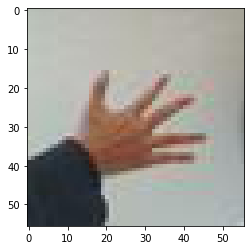

예측확률분포: [0. 1. 0.]
라벨: 2, 예측결과: 1


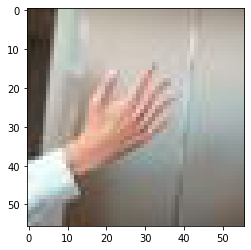

예측확률분포: [0. 0. 1.]
라벨: 0, 예측결과: 2


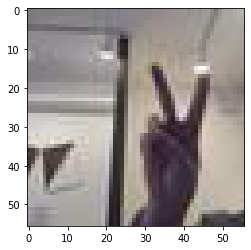

예측확률분포: [0. 0. 1.]
라벨: 0, 예측결과: 2


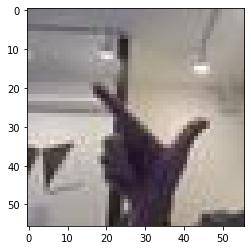

예측확률분포: [0. 1. 0.]
라벨: 2, 예측결과: 1


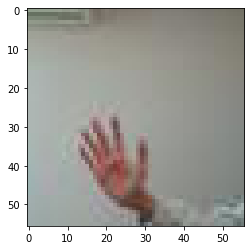

In [104]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모음
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑기
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

___

> Retrospective

예측이 실패한 데이터들을 살펴보면 육안으로는 충분히 구분이 가능한 것으로 보아 딥러닝 네트워크가 충분한 성능을 내고 있지 못함을 알 수 있습니다.

이런 결과가 도출된 원인으로는

<u>1) 학습데이터의 양이 충분하지 않았던 점, 
    
   2) validation data가 따로 없어 overfitting의 위험이 있는 점, 
    
   3) 적절한 하이퍼파라미터를 설정하지 못한 점</u>
   
등이 있을 것입니다.

다음에 이미지 분류 프로젝트를 진행한다면 충분한 데이터를 수집하고, validation을 위한 데이터셋을 따로 마련해 놓아야겠습니다. 